# Tight-Binding with PythTB

Here I calculate the band structure of simple 1d and 2d systems in the tight-binding approximation using `PythTB`. This notebook was made when I was learning how to use [`PythTB`](https://www.physics.rutgers.edu/pythtb/about.html); I did not write the codes from scratch but I modified the sample codes from [their website](https://www.physics.rutgers.edu/pythtb/examples.html) to better understand them.

## Theory

***
The **tight-binding** (TB) model assumes that the full crystal hamiltonian $H$ can be approximated by an atomic hamiltonian that satisfies $H_{at}\phi_n=\mathcal{E}_n\phi_n$ where $\phi_n$ is a bound state for an atom at a certain lattice position (usually conveniently chosen at the origin), i.e. an **atomic orbital**. It is useful for describing energy bands of systems with partially filled d-shells of transition metals and insulators.

In a minimal TB model, we consider only orthonormal basis orbitals $ \langle \phi_{\mathbf{R}i} |   \phi_{\mathbf{R'}j} \rangle = \delta_{\mathbf{R}\mathbf{R'}}\delta_{ij}$ where $\mathbf{R},\mathbf{R'}$ are lattice vectors and the indices $i,j$ run over all the $L$ TB orbitals in the primitive cell. Alternatively, we can write $\langle \mathbf{r} | \phi_{\mathbf{R}i}\rangle=\varphi_{\mu\alpha}(\mathbf{r}-\mathbf{R}-\mathbf{d}_\mu)$ where $\alpha$ labels the orbital, $\mu$ labels the atom, and $\mathbf{d}_\mu$ is the position of atom $\mu$. The matrix elements of the crystal hamiltonian in this basis are:

$$ H_{ij} (\mathbf{R}) =  \langle \phi_{\mathbf{0}i} | H | \phi_{\mathbf{R}j} \rangle $$

We can introduce a small correction $\Delta U(\mathbf{r})$ that captures the potential due to all the other ions besides that in the origin. One can show that the a **linear combination of atomic orbitals** $\psi(\mathbf{r})$ is an eigenstate of the crystal hamiltonian:

$$ H\psi(\mathbf{r}) \equiv [H_{at} + \Delta U(\mathbf{r})]\psi(\mathbf{r})  =  \mathcal{E}_k \psi(\mathbf{r})$$

By Bloch theorem, we can write the eigenstate as

$$  |\psi_{n\mathbf{k}}\rangle = \sum_j C_j^{n\mathbf{k}} | \chi_j^\mathbf{k} \rangle, \qquad |\chi_j^\mathbf{k}\rangle \equiv \sum_\mathbf{R} e^{ i\mathbf{k}\cdot\mathbf{R} } |\phi_{\mathbf{R}j} \rangle$$

Thus, solving the TB hamiltonian is the same as diagonalizing the $L\times L$ matrix $H_\mathbf{k}$ with elements given by $\langle \chi_{i}^\mathbf{k} | H | \chi_{j}^\mathbf{k} \rangle = \sum_\mathbf{R}e^{i\mathbf{k}\cdot(\mathbf{R}+\mathbf{d}_j-\mathbf{d}_i)} H_{ij}(\mathbf{R})$:

$$  H_\mathbf{k} \cdot C_{n\mathbf{k}} = \mathcal{E}_{n\mathbf{k}}C_{n\mathbf{k}} $$

More details in the formalism of TB when using `PythTB` can be found [here](https://www.physics.rutgers.edu/pythtb/formalism.html).
***

## 1d chain of atoms

Let us try using the `PythTB` package to find the energy band of a one-dimensional (1d) chain of identical atoms in periodic boundary condition (PBC) with lattice spacing $a\equiv1$. *Always check the [documentation](https://www.physics.rutgers.edu/pythtb/usage.html) if some functions or routines are unclear.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pythtb as tb #for tight-binding
plt.style.use('ggplot')
%matplotlib inline

First we need to specify the real-space lattice vectors and the positions of the orbitals. Then we need to define the parameters in our TB model such as the on-site energies and the hopping term between TB orbitals. We only consider hopping with the nearest neighbor.

In [2]:
lat = [[1.0]] #real-space lattice vector
orb = [[0.0]] #positions of orbitals in units of lat

In [3]:
chain1d = tb.tb_model(1,1,lat,orb) #initialize the TB model

#specify model parameters
delta=0
t=-1
chain1d.set_onsite([delta]) #set onsite term
chain1d.set_hop(t, 0, 0, [1]) #set hopping term

We can summarize our TB model to verify the parameters.

In [4]:
chain1d.display()

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 1
r-space dimension           = 1
number of spin components   = 1
periodic directions         = [0]
number of orbitals          = 1
number of electronic states = 1
lattice vectors:
 #  0  ===>  [     1.0 ]
positions of orbitals:
 #  0  ===>  [     0.0 ]
site energies:
 #  0  ===>       0.0
hoppings:
<  0 | H |  0 + [  1 ] >     ===>     -1.0 +     0.0 i
hopping distances:
|  pos(  0 )  - pos(  0 + [  1 ] ) |  =       1.0



Additionally we can visualize our system using `visualize`. The red dot is an atom and the green curve is a connection set by the hopping parameters.  

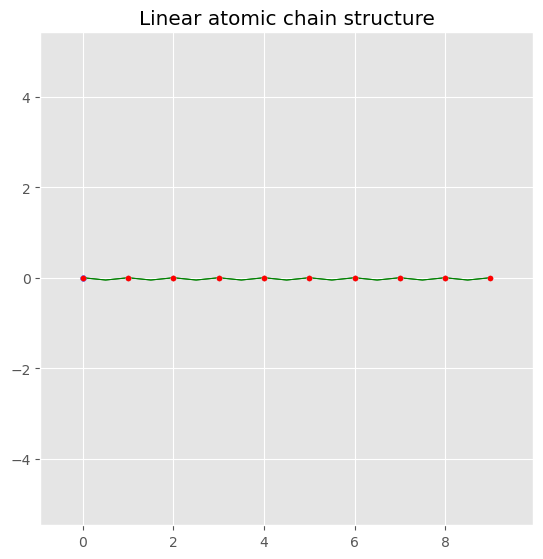

In [5]:
nat = 10 #number of atoms to draw
cut_one=chain1d.cut_piece(nat,0,glue_edgs=False)

fig,ax = cut_one.visualize(0)
ax.set_title('Linear atomic chain structure');

Define the path in $k$-space. We can use `k_path` to create a mesh of `nk` $k$-points. Note that the input `k_label` is units of the reciprocal lattice vectors.

In [6]:
k_label = [-1.5,-1,-0.5,0,0.5,1,1.5]
nk = 100
k_vec,k_dist,k_node = chain1d.k_path(k_label,nk,False)
k_label = [r'$-3\pi$',r'$-2\pi$',r'$-\pi$',
           r'$0$',r'$+\pi$',r'$+2\pi$',r'$+3\pi$']

Solve the model using `solve_all`

In [7]:
eigvals = chain1d.solve_all(k_vec)
eigvals.shape

(1, 100)

>The output eigenvalues have one row which means there is only one band. There are 100 columns each corresponding to the energy for each $k$-point.

Plot band structure

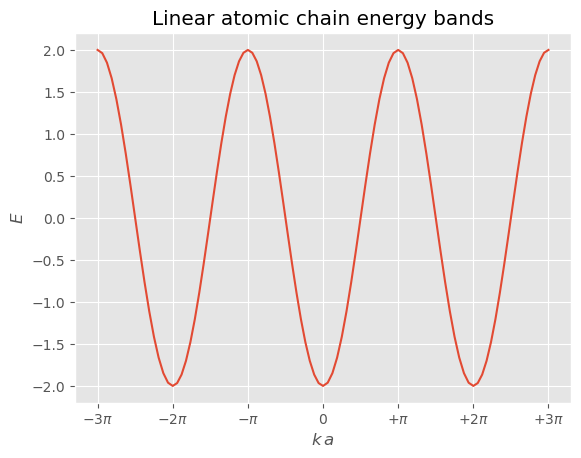

In [8]:
plt.plot(k_dist,eigvals[0])
plt.title('Linear atomic chain energy bands')
plt.ylabel(r'$E$')
plt.xlabel(r'$k\,a$')
plt.xticks(k_node,labels=k_label);

>It is clear that the energy band repeats every $\pm2\pi$ translations in the $k$-space. Thus in practice all we need to plot are the energy values from $-\pi$ to $\pi$, i.e. the 1st Brillouin zone .

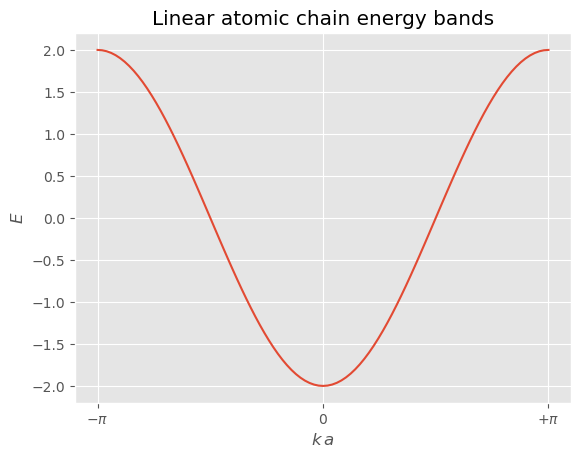

In [9]:
k_vec,k_dist,k_node = chain1d.k_path('fullc',100,False)
k_label = [r'$-\pi$',r'$0$',r'$+\pi$']

evals = chain1d.solve_all(k_vec)

plt.plot(k_dist,evals[0])
plt.title('Linear atomic chain energy bands')
plt.ylabel(r'$E$')
plt.xlabel(r'$k\,a$')
plt.xticks(k_node,labels=k_label);

## 2d case: graphene

Now we're ready to use `PythTB` in the two-dimensional case. The simplest 2d system would be the square lattice, but since it is not common in real materials, I decided to do graphene instead. Graphene crystallizes in a honeycomb lattice which is a triangular Bravais lattice with primitive vectors $(\sqrt{3}/2,\pm 1/2)$ and two basis atoms at $(\pm 1/2,0)$. 

The workflow for calculating the energy bands is the similar as in 1d however with some notable differences:
- we now have two orbitals
- three nearest neighbors (so we have to set the hopping term three times), and
- two bands.

In [10]:
lat = [[np.sqrt(3)/2,-1/2],
       [np.sqrt(3)/2,1/2]] #real-space lattice vector
orb = [[-1/(4*np.sqrt(3)),-1/(4*np.sqrt(3))],
       [1/(4*np.sqrt(3)),1/(4*np.sqrt(3))]] #positions of orbitals in units of lat

In [11]:
graphene = tb.tb_model(2,2,lat,orb) #initialize the TB model

#specify model parameters
delta=0
t=-1
graphene.set_onsite([-delta,delta])
graphene.set_hop(t, 0, 1, [ 0, 0])
graphene.set_hop(t, 1, 0, [ 1, 0])
graphene.set_hop(t, 1, 0, [ 0, 1])

In [12]:
graphene.display()

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 2
r-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [   0.866 ,    -0.5 ]
 #  1  ===>  [   0.866 ,     0.5 ]
positions of orbitals:
 #  0  ===>  [ -0.1443 , -0.1443 ]
 #  1  ===>  [  0.1443 ,  0.1443 ]
site energies:
 #  0  ===>       0.0
 #  1  ===>       0.0
hoppings:
<  0 | H |  1 + [  0 ,  0 ] >     ===>     -1.0 +     0.0 i
<  1 | H |  0 + [  1 ,  0 ] >     ===>     -1.0 +     0.0 i
<  1 | H |  0 + [  0 ,  1 ] >     ===>     -1.0 +     0.0 i
hopping distances:
|  pos(  0 )  - pos(  1 + [  0 ,  0 ] ) |  =       0.5
|  pos(  1 )  - pos(  0 + [  1 ,  0 ] ) |  =    0.6197
|  pos(  1 )  - pos(  0 + [  0 ,  1 ] ) |  =    0.6197



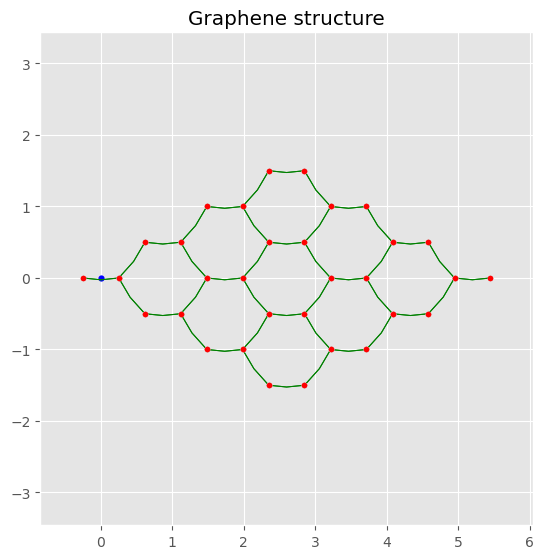

In [13]:
cut_one = graphene.cut_piece(4,0,glue_edgs=False)
cut_two = cut_one.cut_piece(4,1,glue_edgs=False)

fig,ax = cut_two.visualize(0,1)
ax.set_title('Graphene structure');

In [14]:
k_label = [[0,0],[2/3,1/3],[.5,.5],[0,0]]
nk=100
k_vec,k_dist,k_node = graphene.k_path(k_label,nk,False)
k_label = [r'$\Gamma $',r'$K$', r'$M$', r'$\Gamma$']

In [15]:
eigvals = graphene.solve_all(k_vec)
eigvals.shape

(2, 100)

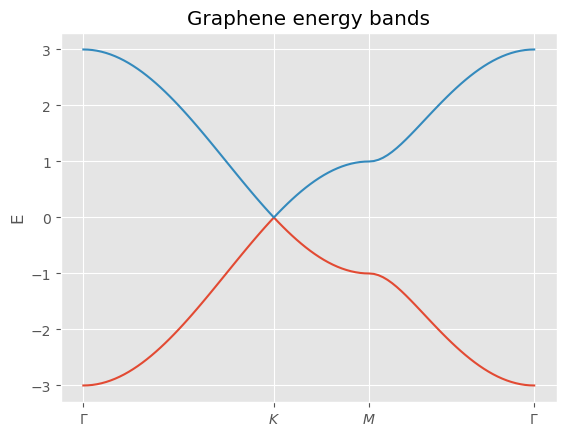

In [16]:
plt.plot(k_dist,eigvals[0])
plt.plot(k_dist,eigvals[1])
plt.title('Graphene energy bands')
plt.ylabel('E')
plt.xticks(k_node,labels=k_label);

**Other helpful resources:**
- This [YouTube video](https://www.youtube.com/watch?v=-PzVB37rP30) is ideal for beginners as it explains step-by-step how to use `PythTB`.
- The book *Berry Phases in Electronic Structure Theory* by Vanderbilt contains the brief review of electronic structure theory and also more sample codes using `PythTB`.
- The book *Solid State Physics* by Ashcroft \& Mermin also provides more details about the TB method.